# Import Data

importing all potentially necessary packages.

In [41]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib as plt
import matplotlib.pyplot as plt

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

importing data then handling values with '-' and making then NaN

In [42]:
# took care of the missing values by defining the dashes as NaNs below.

compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')

# show first 5 lines of data 

compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [43]:
compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [44]:
compdata_original.describe(include='all')

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682,682,674,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,...,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
unique,682,682,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RRST,"Rubicon Technology, Inc.",2834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,...,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,NaN,NaN,NaN,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,...,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,NaN,NaN,NaN,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,...,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,NaN,NaN,NaN,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,...,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,NaN,NaN,NaN,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,...,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,NaN,NaN,NaN,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,...,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000


In [45]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [46]:
compdata_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


## Create Copy of Data

In [47]:
# Create a copy of the data

compdata = compdata_original.copy()

# Variables Calculation

- Drop the rows with mising T2 values
- Can't do calculations with missing data on the number of words, the ratios will be 0 and create outliers


In [48]:
compdata.drop(compdata[compdata['T1'] == 0].index, inplace = True) 
compdata.drop(compdata[compdata['T2'] == 0].index, inplace = True) 
compdata.loc[compdata['T1'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [49]:
compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


## T and S Variables

In [50]:
# Ratios:

    # ** How to find the ratio for T1 and T2... drop them
    # Should the other numbers be dropped? Make a new df with imputed/calculated numbers?

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

In [51]:
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.054250,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.051395,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.061764,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.061630,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.048550,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1


# Missing Values

In [52]:
#compdata = compdata.dropna(how='all', subset=['P(1Day)'])
#compdata.shape

In [53]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 681
Data columns (total 34 columns):
I1         680 non-null object
I2         680 non-null object
I3         672 non-null object
P(IPO)     675 non-null float64
P(H)       670 non-null float64
P(L)       670 non-null float64
P(1Day)    658 non-null float64
C1         658 non-null float64
C2         658 non-null float64
C3         644 non-null float64
C4         658 non-null float64
C5         674 non-null float64
C6         674 non-null float64
C7         608 non-null float64
T1         679 non-null float64
T2         679 non-null float64
T3         679 non-null float64
T4         679 non-null float64
T5         679 non-null float64
S1         679 non-null float64
S2         679 non-null float64
S3         679 non-null float64
T3_        679 non-null float64
T4_        679 non-null float64
T5_        679 non-null float64
S1_        679 non-null float64
S2_        679 non-null float64
S3_        679 non-null float64
P(

## Fill in C2 with Mode

In [54]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [55]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,1.0


## Impute C3

In [96]:
compdata['Imputed_C3'] = compdata['C3'].fillna(compdata['C2'].median())

In [97]:
# check to see if Imputed_C2 has any missing values

compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
Imputed_C2     0
Imputed_C3     0
dtype: int64

In [57]:
# We found that there are some values in I3 that have multiple strings in them.  
# We need to make these singular and make this column type into int.

#isinstance(compdata['I3'], object) 

#compdata['I3'] = [isinstance(x, str) for x in compdata.I3]
#compdata

#compdata[compdata.I3.apply(lambda x: isinstance(x, str))]


# Descriptive Statistics 
- .describe() will give us a good summary of the data we're working with.

In [58]:
compdata.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
count,675.000000,670.000000,670.000000,658.000000,658.000000,658.000000,644.000000,658.000000,6.740000e+02,6.740000e+02,...,679.000000,679.000000,679.000000,670.000000,680.000000,674.000000,680.000000,680.000000,680.000000,680.000000
mean,13.840148,15.476657,13.510612,25.976604,149.849544,0.858663,1.792270,0.007235,4.939468e+07,1.238438e+07,...,0.005490,0.009154,0.011835,14.493634,0.483824,4.641534,5.245685,0.500000,0.677941,0.863235
std,6.061555,6.662624,5.843541,73.342240,153.033149,0.348634,162.919289,0.033304,1.045288e+08,2.515588e+07,...,0.004798,0.004309,0.008982,6.238462,0.500106,6.280361,10.755064,0.500368,0.467609,0.343852
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,-0.000093,0.002152,0.005125,3.500000,0.000000,0.283223,0.000000,0.000000,0.000000,0.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.860000,-0.014018,1.870678e+07,5.000000e+06,...,0.004142,0.007023,0.009568,11.500000,0.000000,2.853439,0.000000,0.000000,0.000000,1.000000
50%,13.500000,15.000000,13.000000,14.865000,107.000000,1.000000,0.010000,0.009125,2.736198e+07,7.361666e+06,...,0.005050,0.008592,0.011299,14.000000,0.000000,3.766083,0.000000,0.500000,1.000000,1.000000
75%,17.000000,17.000000,15.000000,20.495000,155.750000,1.000000,0.470000,0.031496,4.993595e+07,1.193426e+07,...,0.006255,0.010509,0.012857,16.000000,1.000000,4.906387,7.142857,1.000000,1.000000,1.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,0.121442,0.091082,0.233397,121.500000,1.000000,99.787255,100.000000,1.000000,1.000000,1.000000


In [59]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 681
Data columns (total 35 columns):
I1            680 non-null object
I2            680 non-null object
I3            672 non-null object
P(IPO)        675 non-null float64
P(H)          670 non-null float64
P(L)          670 non-null float64
P(1Day)       658 non-null float64
C1            658 non-null float64
C2            658 non-null float64
C3            644 non-null float64
C4            658 non-null float64
C5            674 non-null float64
C6            674 non-null float64
C7            608 non-null float64
T1            679 non-null float64
T2            679 non-null float64
T3            679 non-null float64
T4            679 non-null float64
T5            679 non-null float64
S1            679 non-null float64
S2            679 non-null float64
S3            679 non-null float64
T3_           679 non-null float64
T4_           679 non-null float64
T5_           679 non-null float64
S1_           679 non-n

In [60]:
compdata.isna().any()

I1            False
I2            False
I3             True
P(IPO)         True
P(H)           True
P(L)           True
P(1Day)        True
C1             True
C2             True
C3             True
C4             True
C5             True
C6             True
C7             True
T1             True
T2             True
T3             True
T4             True
T5             True
S1             True
S2             True
S3             True
T3_            True
T4_            True
T5_            True
S1_            True
S2_            True
S3_            True
P(mid)         True
C3_           False
C5_            True
C6_           False
Y1            False
Y2            False
Imputed_C2    False
dtype: bool

In [61]:
compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
Imputed_C2     0
dtype: int64

In [62]:
compdata.shape

(680, 35)

In [63]:
compdata.median()

P(IPO)        1.350000e+01
P(H)          1.500000e+01
P(L)          1.300000e+01
P(1Day)       1.486500e+01
C1            1.070000e+02
C2            1.000000e+00
C3            1.000000e-02
C4            9.124591e-03
C5            2.736198e+07
C6            7.361666e+06
C7            1.023630e+02
T1            4.440000e+02
T2            1.204900e+04
T3            1.076400e+04
T4            2.790000e+02
T5            6.240000e+02
S1            6.000000e+01
S2            1.000000e+02
S3            1.340000e+02
T3_           8.970418e-01
T4_           6.289979e-01
T5_           5.186308e-02
S1_           5.049787e-03
S2_           8.592018e-03
S3_           1.129944e-02
P(mid)        1.400000e+01
C3_           0.000000e+00
C5_           3.766083e+00
C6_           0.000000e+00
Y1            5.000000e-01
Y2            1.000000e+00
Imputed_C2    1.000000e+00
dtype: float64

# Imputation

## C2
- Since C2 is a binary value, we will fill the missing data with the mode
- doesn't look like this is working... see line 10

In [64]:
compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,1.0


## I3
- this is an industry classifier.  Since there are only 8 missing values, we can find this information online.

In [65]:
compdata_cat.loc[compdata_cat['I3'].isnull()]

,I1,I2,I3,C2,C3_,Y1,Y2,Imputed_C2
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,0,0,0,1.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,0,0,0,1.0
268,GSL,GLOBAL SIGNAL INC,NaN,NaN,0,0,0,1.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,0,0,0,1.0
400,NAUH,"National American University Holdings, Inc.",NaN,NaN,0,0,0,1.0
490,RCH,"CHINA CGAME, INC.",NaN,NaN,0,0,0,1.0
597,TRMM,"Access to Money, Inc.",NaN,NaN,0,0,0,1.0
614,TZOO,TRAVELZOO INC,NaN,NaN,0,0,0,1.0


## FILL IN MISSING VALUES BELOW

- missing companies: ADKU, BLT, GSL, KFI, NAUH, RCH, TRMM, TZOO - 
- we aren't able to easily define the object 'I3' as an integer, so we took a look at the data in excel.
- there are 4 values with multiple SIC Codes separated by commas inside, explaining why it won't change to integer easily.

In [66]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.004513,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1,1.0


In [67]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.005922,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1,0.0


In [68]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.006539,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1,1.0


In [69]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.0042,0.008835,0.00956,8.0,1,1.666667,0.0,1,1,0.0


- we need to change these values to only 1 value!

In [70]:
compdata.loc[174, ['I3']] = 3500
# since the majority of Dolby's values are in manufacturing, will bin them there

compdata.loc[187, ['I3']] = 9999
# very random jumble of values so will put them in unclassified.

compdata.loc[499, ['I3']] = 3500
# majority are also manufacturing so will put them there. 

compdata.loc[620, ['I3']] = 9999
# two different industries so will put them in unclassified.

- make I3 column a string!

In [71]:
compdata['I3'] = compdata['I3'].astype(int)

ValueError: cannot convert float NaN to integer

In [72]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    
compdata['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  # Creating a new column I3_bins in the dataframe

compdata.head()

TypeError: '>=' not supported between instances of 'str' and 'int'

# P(1Day)
- there are 22 missing values for this one.  Since the first day trading price is a factual value, it does not make sense to fill this in using imputation methods.  Only option is to drop the missing values.

# Outliers:

In [73]:
compdata_cont.skew()

P(IPO)      3.385916
P(H)        9.206708
P(L)        7.101522
P(1Day)    12.300741
C1          5.640498
C3         20.561940
C4         -0.480464
C5         13.581495
C6         12.558874
C7         11.705896
T1          1.749855
T2          1.694479
T3          1.633107
T4          1.434680
T5         12.799650
S1          2.315356
S2          3.760493
S3          3.463877
T3_        25.640745
T4_         0.083849
T5_        26.054070
S1_        20.915717
S2_        10.504441
S3_        22.237729
P(mid)      8.222568
C3_         0.064883
C5_        10.591406
C6_         4.430896
Y1          0.000000
Y2         -0.763313
dtype: float64

In [74]:
compdata_cat.skew()

C2           -2.063802
C3_           0.064883
Y1            0.000000
Y2           -0.763313
Imputed_C2   -2.118976
dtype: float64

In [75]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 

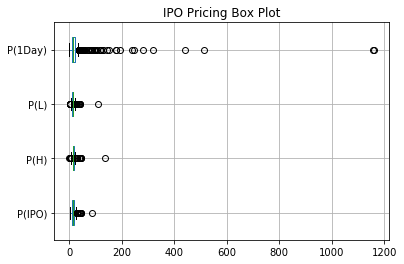

In [76]:
compdata.boxplot(column=['P(IPO)','P(H)','P(L)','P(1Day)'], vert=False)
plt.title('IPO Pricing Box Plot')
plt.show()

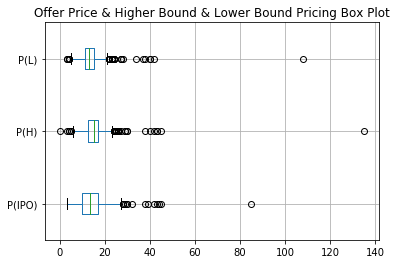

In [77]:
# Take P(1Day) out to create more even results

compdata.boxplot(column=['P(IPO)','P(H)','P(L)'], vert=False)
plt.title('Offer Price & Higher Bound & Lower Bound Pricing Box Plot')
plt.show()

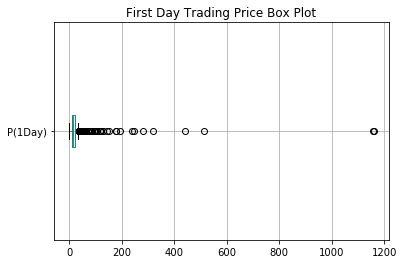

In [78]:
compdata.boxplot(column='P(1Day)', vert=False)
plt.title('First Day Trading Price Box Plot')
plt.show()

As we see above, the P(1Day) is positively skewed, so we should be looking to fill the missing values with:
- Square root
- Cube root
- log



ref: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55

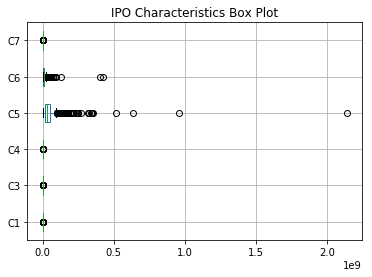

In [79]:
compdata.boxplot(column=['C1','C3','C4','C5','C6','C7'],vert=False)
plt.title('IPO Characteristics Box Plot')
plt.show()

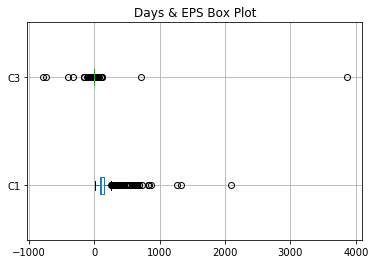

In [80]:
# Seperate the variables into that fit better with one another into their own box plot
    # Help visualization

compdata.boxplot(column=['C1','C3'],vert=False)
plt.title('Days & EPS Box Plot')
plt.show()

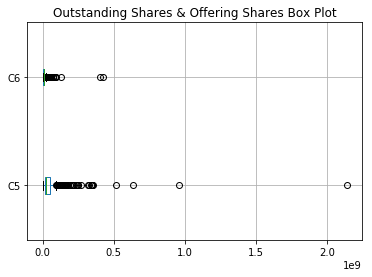

In [81]:
compdata.boxplot(column=['C5','C6'],vert=False)
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

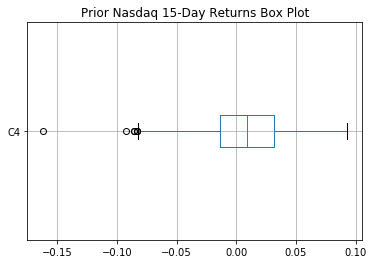

In [82]:
compdata.boxplot(column='C4',vert=False)
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

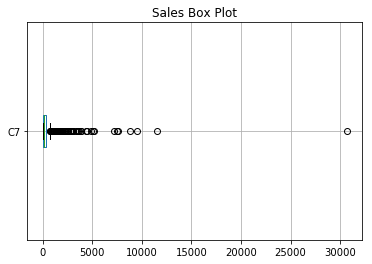

In [83]:
compdata.boxplot(column='C7',vert=False)
plt.title('Sales Box Plot')
plt.show()

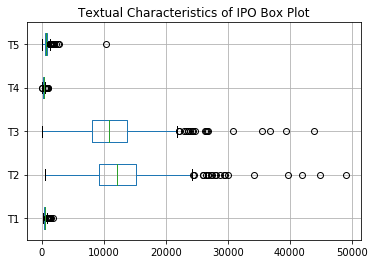

In [84]:
compdata.boxplot(column=['T1','T2','T3','T4','T5'],vert=False)
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

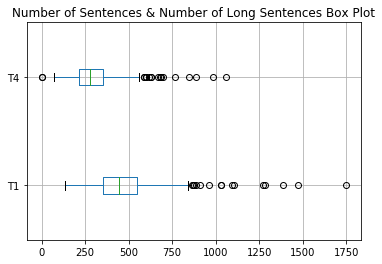

In [85]:
compdata.boxplot(column=['T1','T4'],vert=False)
plt.title('Number of Sentences & Number of Long Sentences Box Plot')
plt.show()

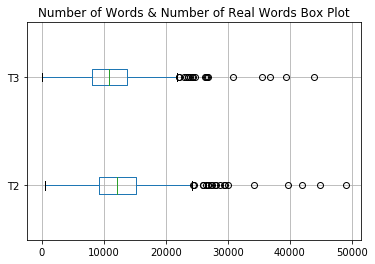

In [86]:
compdata.boxplot(column=['T2','T3'],vert=False)
plt.title('Number of Words & Number of Real Words Box Plot')
plt.show()

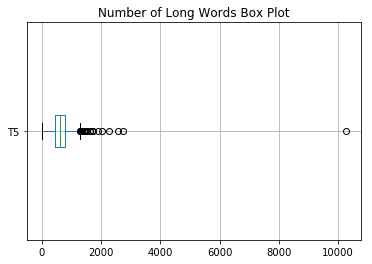

In [87]:
compdata.boxplot(column='T5',vert=False)
plt.title('Number of Long Words Box Plot')
plt.show()

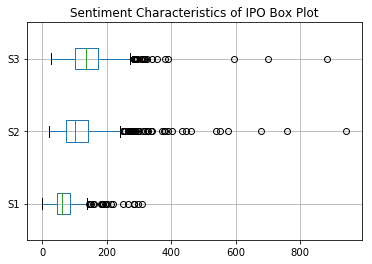

In [88]:
compdata.boxplot(column=['S1','S2','S3'],vert=False)
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

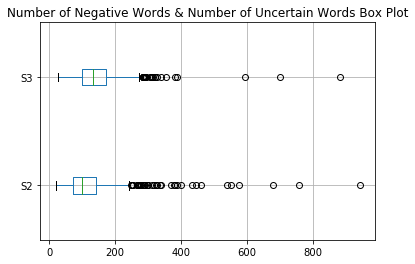

In [89]:
compdata.boxplot(column=['S2','S3'],vert=False)
plt.title('Number of Negative Words & Number of Uncertain Words Box Plot')
plt.show()

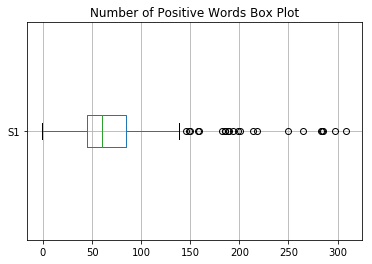

In [90]:
compdata.boxplot(column='S1',vert=False)
plt.title('Number of Positive Words Box Plot')
plt.show()

In [91]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    
compdata['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  # Creating a new column I3_bins in the dataframe

compdata.head()

TypeError: '>=' not supported between instances of 'str' and 'int'

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [92]:
Q1 = compdata['P(IPO)'].quantile(0.25)
Q3 = compdata['P(IPO)'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - (1.5 * IQR)
UpperBound = Q3 + (1.5 * IQR)

# compdata[((compdata['P(IPO)'] < LowerBound) |(compdata['P(IPO)'] > UpperBound))]

In [93]:
iqrdata = compdata_int.describe()
iqrdata

NameError: name 'compdata_int' is not defined

In [94]:
# This dataframe has rows for the IQR Upper Bound and Lower Bound numbers for each variable

iqrdata.loc['IQR'] = (iqrdata.loc['75%']-iqrdata.loc['25%'])
iqrdata.loc['UpperRange'] = (iqrdata.loc['75%']+(1.5*iqrdata.loc['IQR']))
iqrdata.loc['LowerRange'] = (iqrdata.loc['25%']-(1.5*iqrdata.loc['IQR']))
iqrdata

NameError: name 'iqrdata' is not defined

## Make 2 Separate DFs for Continuous and Categorical

In [23]:
# Create DF with only continuous features

compdata_cont = compdata.drop(['I1','I2','I3','C2','Imputed_C2'], axis=1)
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
0,10.0,9.5,8.5,11.870000,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,...,0.054250,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1
1,8.0,10.0,8.0,7.250000,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,...,0.051395,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0
2,7.0,14.0,12.0,6.700000,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,...,0.061764,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0
3,11.5,16.0,14.0,12.390000,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,...,0.061630,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1
4,21.0,21.0,19.0,56.599998,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,...,0.048550,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1


In [24]:
# Create DF with only categorical features

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2,C3_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,1,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,0,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,0,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,0,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,1,0,1,1.0


- We need to connect the upper bound and lower bound limits to all the variable results in the original dataframe
- Check to make sure the dataframe shows these changes in variables
- Create a new dataframe of the results excluding the outliers

# Binning

| Field | Definition | 
| ------------ | ---------- | 
| Unnamed | Row number |
| abv | The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol |
| ibu | International bittering units, which describe how bitter a drink is. |
| id | Unique ID |
| name | Name of the beer. |
| style | Beer style (lager, pale ale, IPA, etc.) |
| brewery_id (FK) | Unique identifier for brewery that produces this beer; can use to join with brewery info. |


In [ ]:
#Creating Bins for ploting and understanding of the target 

## Binning for Continuous and categorical 

def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
compdata['I3_bins'] = df['W'].apply(assign_I3_bins)  # Creating a new column I3_bins in the dataframe

compdata.head()